About this file
Car Evaluation Database was derived from a simple hierarchical decision model originally developed for the demonstration of DEX, M. Bohanec, V. Rajkovic: Expert system for decision making. Sistemica 1(1), pp. 145-157, 1990.). The model evaluates cars according to the following concept structure:

CAR car acceptability
. PRICE overall price
. . buying buying price
. . maint price of the maintenance
. TECH technical characteristics
. . COMFORT comfort
. . . doors number of doors
. . . persons capacity in terms of persons to carry
. . . lug_boot the size of luggage boot
. . safety estimated safety of the car

Input attributes are printed in lowercase. Besides the target concept (CAR), the model includes three intermediate concepts: PRICE, TECH, COMFORT. Every concept is in the original model related to its lower level descendants by a set of examples (for these examples sets see [Web Link]).

The Car Evaluation Database contains examples with the structural information removed, i.e., directly relates CAR to the six input attributes: buying, maint, doors, persons, lug_boot, safety.

Because of known underlying concept structure, this database may be particularly useful for testing constructive induction and structure discovery methods.

Attribute Information:

Class Values:

unacc, acc, good, vgood

Attributes:

buying: vhigh, high, med, low.
maint: vhigh, high, med, low.
doors: 2, 3, 4, 5more.
persons: 2, 4, more.
lug_boot: small, med, big.
safety: low, med, high.




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier

data = pd.read_csv("car.csv", header=None) 




#data[data.head[0]]='buying_price'
#data


# Sanity Check

In [2]:
data.columns

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')

In [3]:
data.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
data.tail()

,0,1,2,3,4,5,6
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


In [5]:
data.columns=['buying price','maint price','doors','persons','lug_boot','safety','Target']
data
                
            

,buying price,maint price,doors,persons,lug_boot,safety,Target
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [6]:
data.shape


(1728, 7)

# EDA

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   buying price  1728 non-null   object
 1   maint price   1728 non-null   object
 2   doors         1728 non-null   object
 3   persons       1728 non-null   object
 4   lug_boot      1728 non-null   object
 5   safety        1728 non-null   object
 6   Target        1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [8]:
#Insights
#Convert all the categorical columns to numeric
#1)given buying datatype  as object, convert it to number using label encoding
#2)given maint price datatype  as object, convert it to number using label encoding
#3)given doors price datatype  as object, convert it to number using label encoding 
#4)given person price datatype  as object, convert it to number using label encoding
#5)given lugboot price datatype  as object, convert it to number using label encoding 
#6)given safety price datatype  as object, convert it to number using label encoding 


# Comparitive analysis

In [9]:
bprice=pd.crosstab(data['buying price'],data['Target'])
bprice

Target,acc,good,unacc,vgood
buying price,,,,
high,108,0,324,0
low,89,46,258,39
med,115,23,268,26
vhigh,72,0,360,0


In [10]:
sm=bprice.sum(axis=1)
sm

buying price
high     432
low      432
med      432
vhigh    432
dtype: int64

In [11]:
bprice.div(sm, axis=0).round(2)

Target,acc,good,unacc,vgood
buying price,,,,
high,0.25,0.00,0.75,0.00
low,0.21,0.11,0.60,0.09
med,0.27,0.05,0.62,0.06
vhigh,0.17,0.00,0.83,0.00


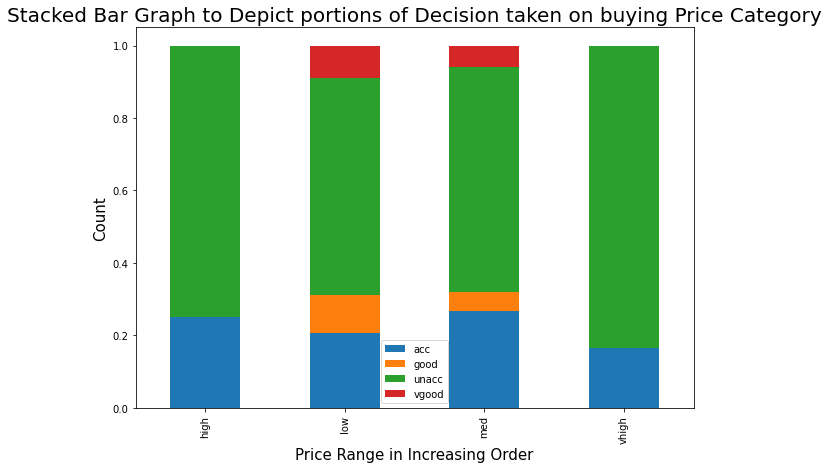

In [12]:
bprice.div(bprice.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 7))
plt.title('Stacked Bar Graph to Depict portions of Decision taken on buying Price Category', fontsize = 20)
plt.xlabel('Price Range in Increasing Order', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.legend()
plt.show()

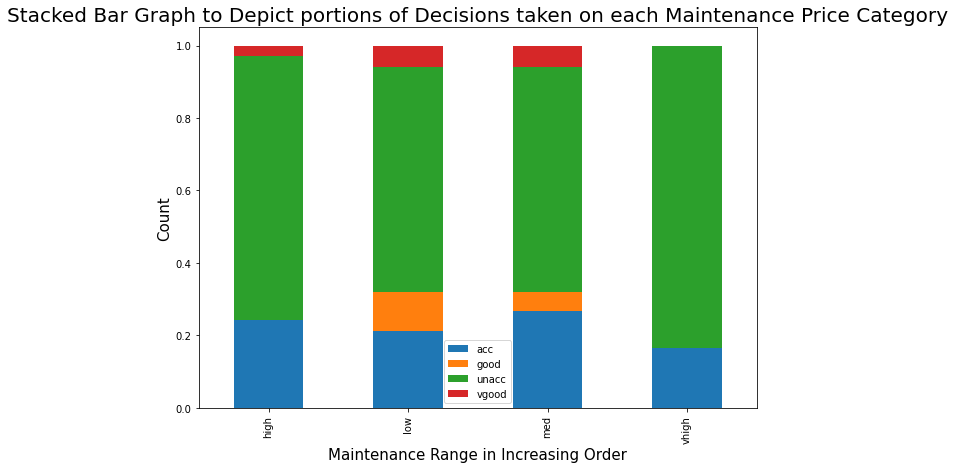

In [13]:
mprice=pd.crosstab(data['maint price'],data['Target'])
mprice.div(mprice.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 7))
plt.title('Stacked Bar Graph to Depict portions of Decisions taken on each Maintenance Price Category', fontsize = 20)
plt.xlabel('Maintenance Range in Increasing Order', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.legend()
plt.show()

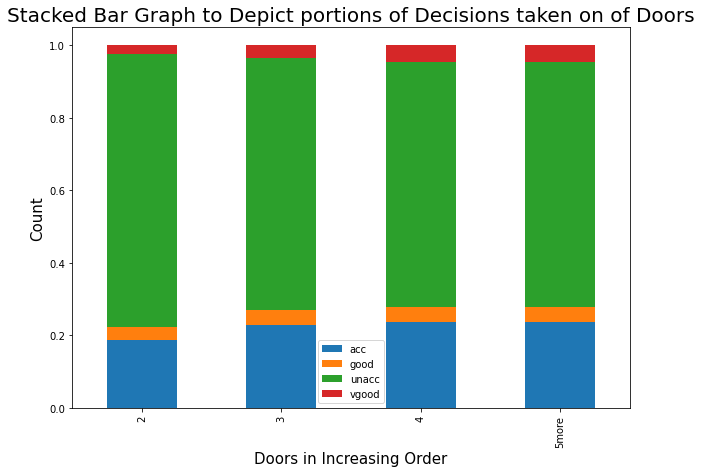

In [14]:
door=pd.crosstab(data['doors'],data['Target'])
door.div(door.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 7))
plt.title('Stacked Bar Graph to Depict portions of Decisions taken on of Doors', fontsize = 20)
plt.xlabel('Doors in Increasing Order', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.legend()
plt.show()

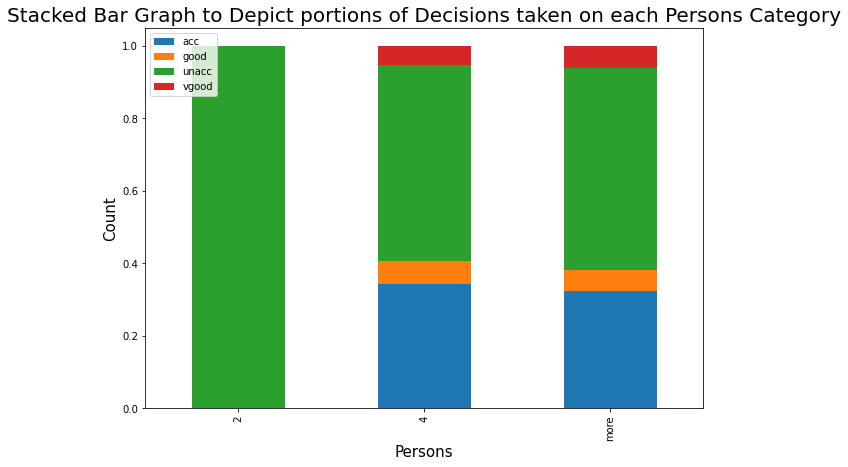

In [15]:
person=pd.crosstab(data['persons'],data['Target'])
person.div(person.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 7))
plt.title('Stacked Bar Graph to Depict portions of Decisions taken on each Persons Category', fontsize = 20)
plt.xlabel('Persons', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.legend()
plt.show()

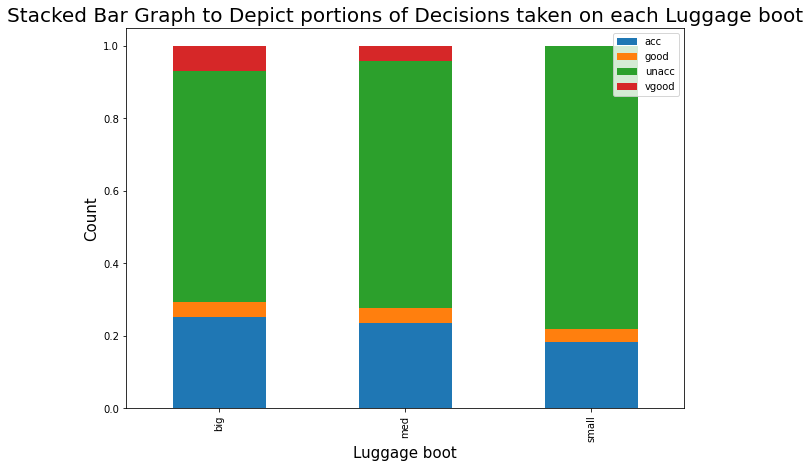

In [16]:
luggage=pd.crosstab(data['lug_boot'],data['Target'])
luggage.div(luggage.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 7))
plt.title('Stacked Bar Graph to Depict portions of Decisions taken on each Luggage boot', fontsize = 20)
plt.xlabel('Luggage boot', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.legend()
plt.show()

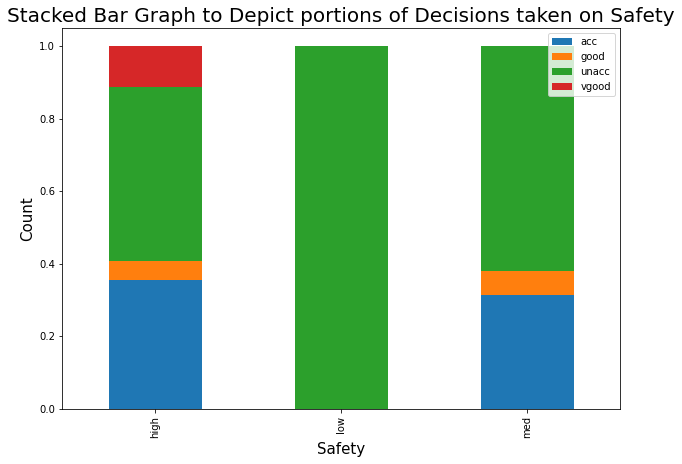

In [17]:
safety=pd.crosstab(data['safety'],data['Target'])
safety.div(safety.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 7))
plt.title('Stacked Bar Graph to Depict portions of Decisions taken on Safety', fontsize = 20)
plt.xlabel('Safety', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.legend()
plt.show()

## Uni-Variate Data Analysis

In [18]:
data['Target'].value_counts().sort_index()

acc       384
good       69
unacc    1210
vgood      65
Name: Target, dtype: int64

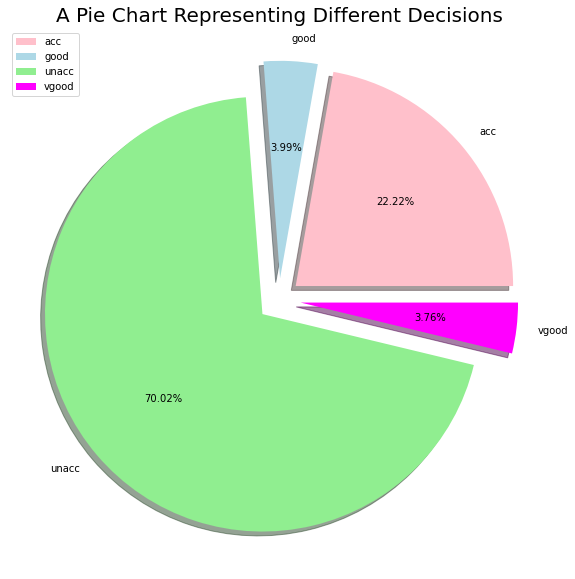

In [19]:
labels = ['acc', 'good', 'unacc', 'vgood']
colors = ['pink', 'lightblue', 'lightgreen', 'magenta']
size = [384, 69, 1210, 65]
explode = [0.1, 0.1, 0.1, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title('A Pie Chart Representing Different Decisions', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [20]:
# Label Encoding

data.Target.replace(('unacc', 'acc', 'good', 'vgood'), (0, 1, 2, 3), inplace = True)

data['Target'].value_counts()

0    1210
1     384
2      69
3      65
Name: Target, dtype: int64

In [21]:
data['lug_boot'].value_counts().sort_index()


big      576
med      576
small    576
Name: lug_boot, dtype: int64

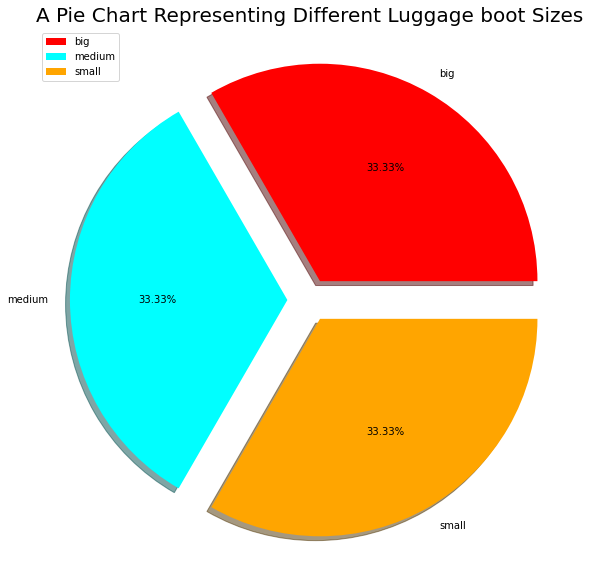

In [22]:
labels = ['big', 'medium', 'small',]
colors = ['red', 'cyan', 'orange']
size = [576, 576, 576]
explode = [0.1, 0.1, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('A Pie Chart Representing Different Luggage boot Sizes', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [23]:
data['safety'].value_counts().sort_index()


high    576
low     576
med     576
Name: safety, dtype: int64

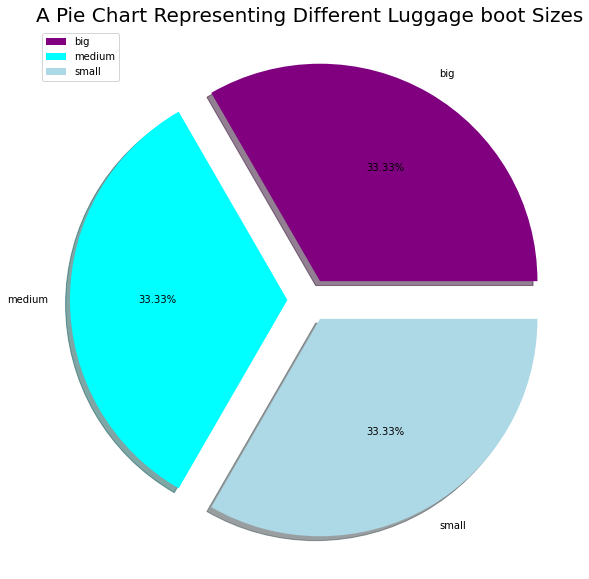

In [24]:
labels = ['big', 'medium', 'small',]
colors = ['purple', 'cyan', 'lightblue']
size = [576, 576, 576]
explode = [0.1, 0.1, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('A Pie Chart Representing Different Luggage boot Sizes', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [25]:
data['buying price'].value_counts().sort_index()

high     432
low      432
med      432
vhigh    432
Name: buying price, dtype: int64

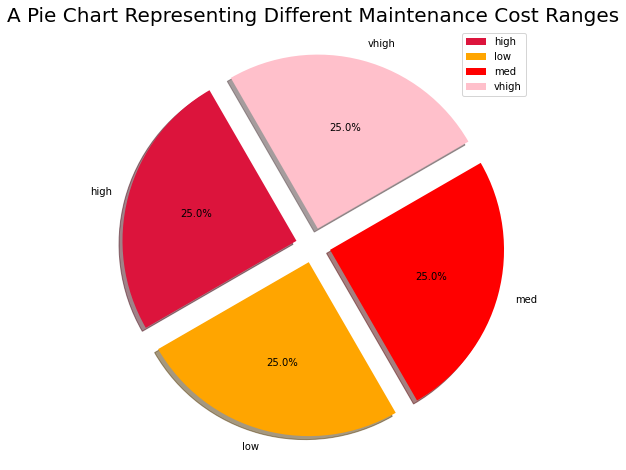

In [26]:
labels = ['high', 'low', 'med', 'vhigh']
colors = ['crimson', 'orange', 'red', 'pink']
size = [432, 432, 432, 432]
explode = [0.1, 0.1, 0.1, 0.1]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels = labels, colors = colors, explode = explode, autopct='%1.1f%%', shadow = True, startangle = 120)
plt.title('A Pie Chart Representing Different Maintenance Cost Ranges', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [27]:
data['maint price'].value_counts().sort_index()

high     432
low      432
med      432
vhigh    432
Name: maint price, dtype: int64

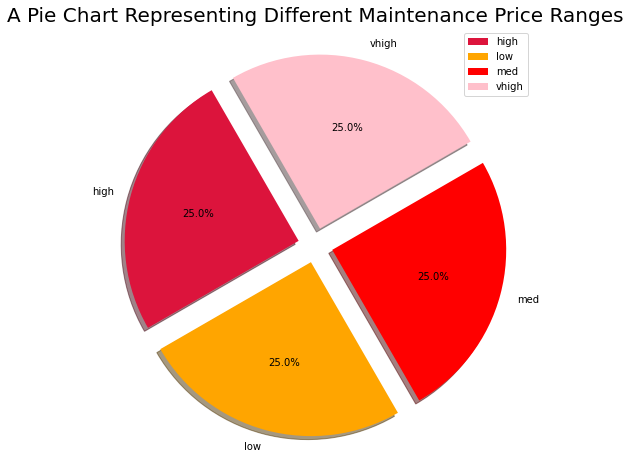

In [28]:
labels = ['high', 'low', 'med', 'vhigh']
colors = ['crimson', 'orange', 'red', 'pink']
size = [432, 432, 432, 432]
explode = [0.1, 0.1, 0.1, 0.1]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 120, autopct = '%1.1f%%')
plt.title('A Pie Chart Representing Different Maintenance Price Ranges', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [29]:
data['doors'].value_counts().sort_index()
#data['doors']


2        432
3        432
4        432
5more    432
Name: doors, dtype: int64

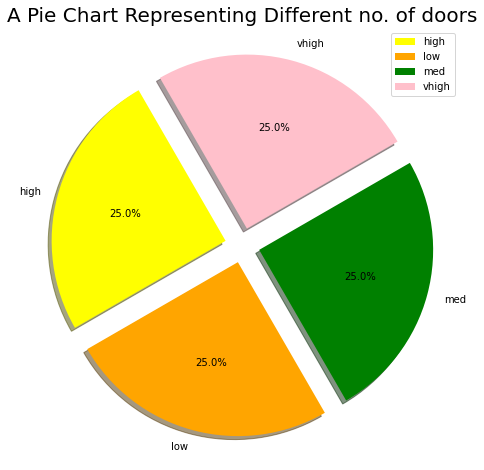

In [30]:
labels = ['high', 'low', 'med', 'vhigh']
colors = ['yellow', 'orange', 'green', 'pink']
size = [432, 432, 432, 432]
explode = [0.1, 0.1, 0.1, 0.1]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels = labels, colors = colors, explode = explode, autopct='%1.1f%%', shadow = True, startangle = 120)
plt.title('A Pie Chart Representing Different no. of doors', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [31]:
data['persons'].value_counts().sort_index()


2       576
4       576
more    576
Name: persons, dtype: int64

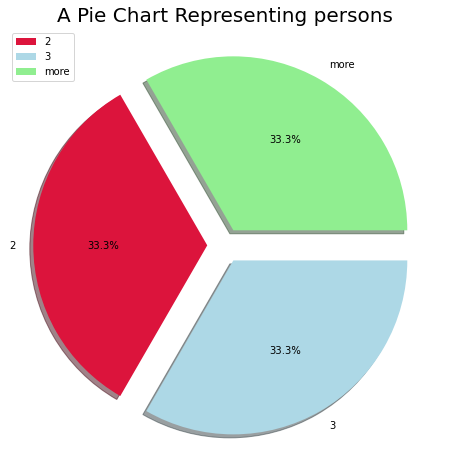

In [32]:
labels = ['2', '3', 'more']
colors = ['crimson', 'lightblue', 'lightgreen']
size = [576, 576, 576]
explode = [0.1, 0.1, 0.1]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels = labels, colors = colors, explode = explode, autopct='%1.1f%%', shadow = True, startangle = 120)
plt.title('A Pie Chart Representing persons', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

# BI-Variate Data Analysis



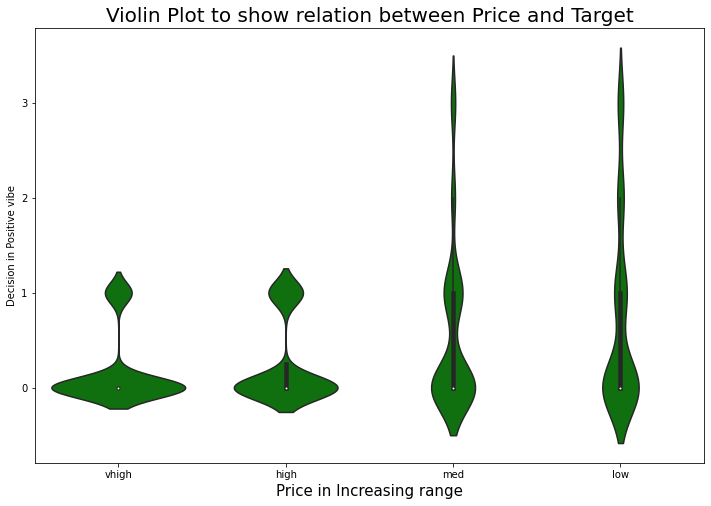

In [33]:
plt.rcParams['figure.figsize'] = (12, 8)
ax = sns.violinplot(x = data['buying price'], y = data['Target'], color = 'g')
ax.set_title('Violin Plot to show relation between Price and Target', fontsize = 20)
ax.set_xlabel('Price in Increasing range', fontsize = 15)
ax.set_ylabel('Decision in Positive vibe')
plt.show()


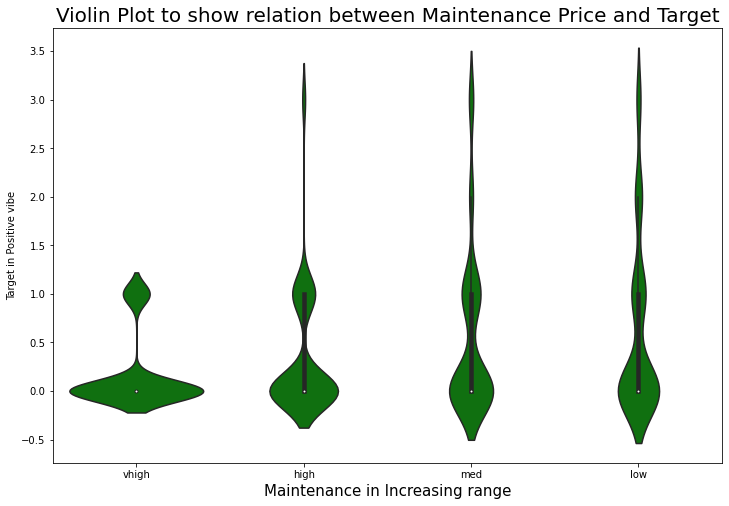

In [34]:
plt.rcParams['figure.figsize'] = (12, 8)
ax = sns.violinplot(x = data['maint price'], y = data['Target'], color = 'g')
ax.set_title('Violin Plot to show relation between Maintenance Price and Target', fontsize = 20)
ax.set_xlabel('Maintenance in Increasing range', fontsize = 15)
ax.set_ylabel('Target in Positive vibe')
plt.show()


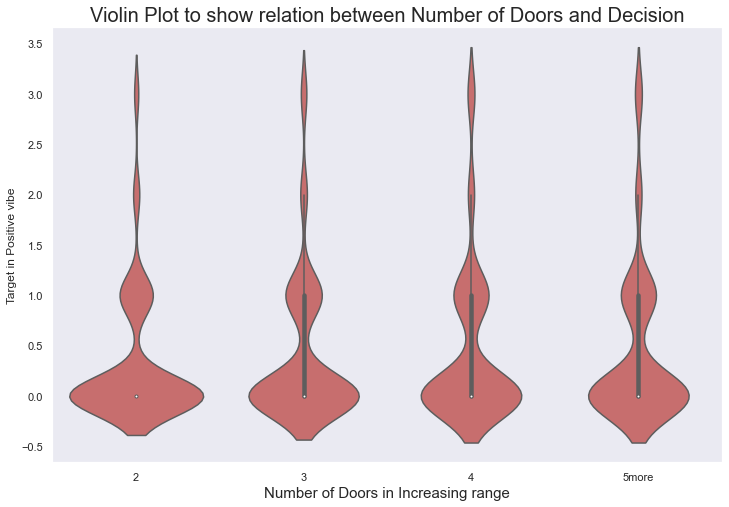

In [35]:
sns.set(style = 'dark', palette = 'muted', color_codes = True)
plt.rcParams['figure.figsize'] = (12, 8)

ax = sns.violinplot(x = data['doors'], y = data['Target'], color = 'r')
ax.set_title('Violin Plot to show relation between Number of Doors and Decision', fontsize = 20)
ax.set_xlabel('Number of Doors in Increasing range', fontsize = 15)
ax.set_ylabel('Target in Positive vibe')
plt.show()


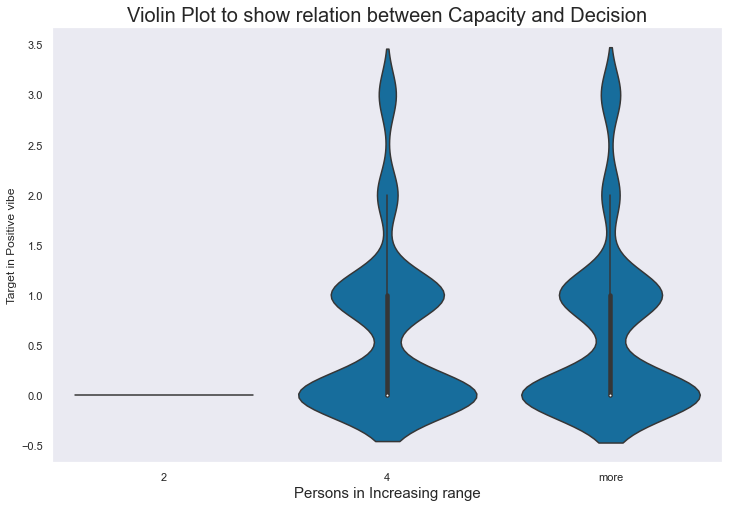

In [36]:
sns.set(style = 'dark', palette = 'colorblind', color_codes = True)
plt.rcParams['figure.figsize'] = (12, 8)

ax = sns.violinplot(x = data['persons'], y = data['Target'], color = 'b')
ax.set_title('Violin Plot to show relation between Capacity and Decision', fontsize = 20)
ax.set_xlabel('Persons in Increasing range', fontsize = 15)
ax.set_ylabel('Target in Positive vibe')
plt.show()

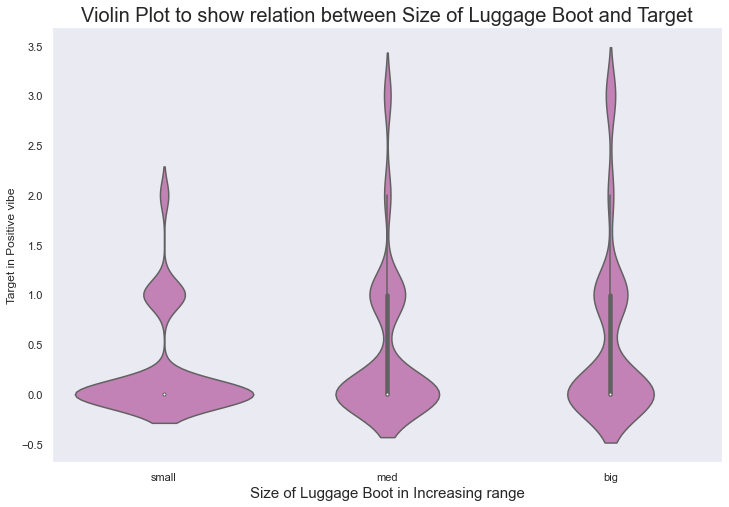

In [37]:
sns.set(style = 'dark', palette = 'colorblind', color_codes = True)
plt.rcParams['figure.figsize'] = (12, 8)

ax = sns.violinplot(x = data['lug_boot'], y = data['Target'], color = 'm')
ax.set_title('Violin Plot to show relation between Size of Luggage Boot and Target', fontsize = 20)
ax.set_xlabel('Size of Luggage Boot in Increasing range', fontsize = 15)
ax.set_ylabel('Target in Positive vibe')
plt.show()

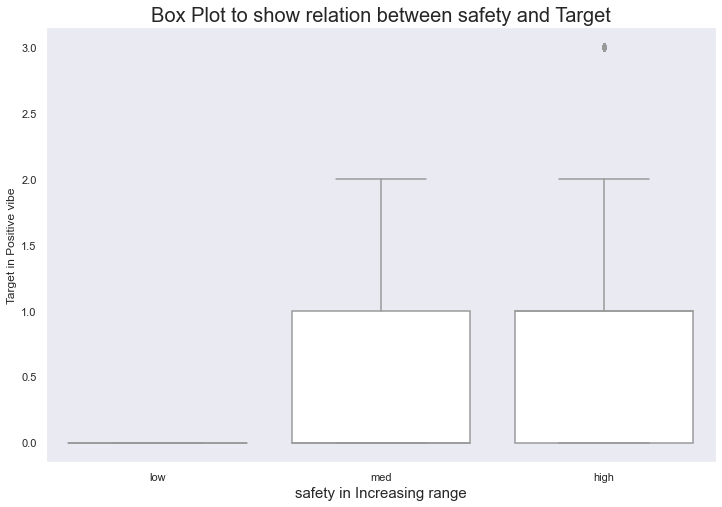

In [38]:
sns.set(style = 'dark', palette = 'colorblind', color_codes = True)
plt.rcParams['figure.figsize'] = (12, 8)

ax = sns.boxplot(x = data['safety'], y = data['Target'], color = 'w')
ax.set_title('Box Plot to show relation between safety and Target', fontsize = 20)
ax.set_xlabel('safety in Increasing range', fontsize = 15)
ax.set_ylabel('Target in Positive vibe')
plt.show()

<AxesSubplot:xlabel='lug_boot', ylabel='Target'>

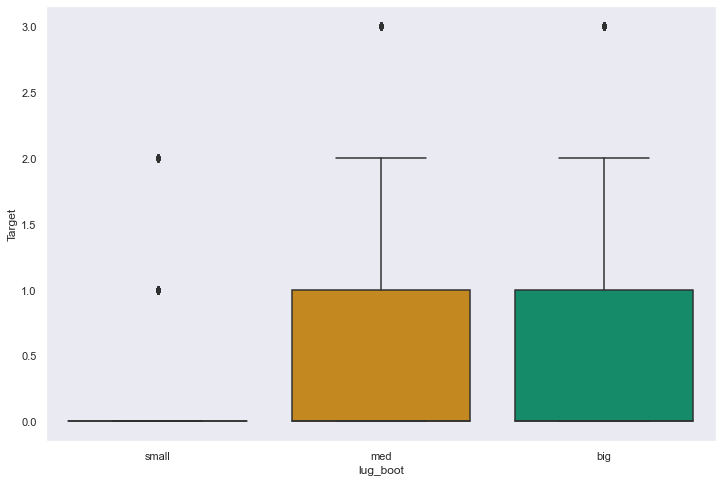

In [39]:

 
sns.boxplot(data = data , x = 'lug_boot' , y = 'Target' )

<AxesSubplot:xlabel='persons', ylabel='Target'>

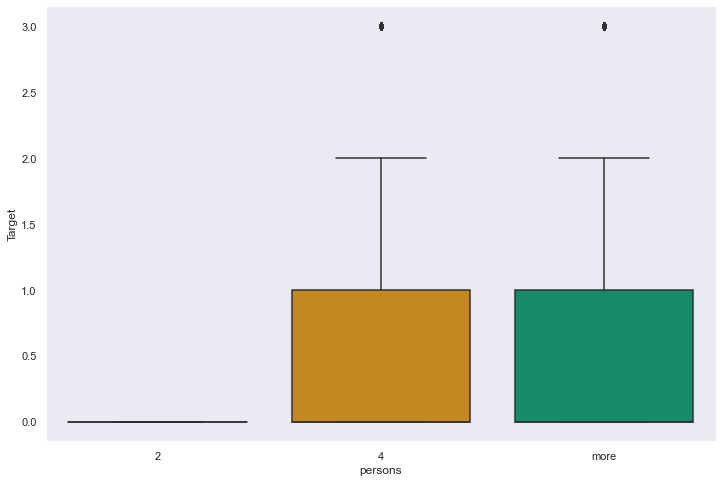

In [40]:
sns.boxplot(data = data , x = 'persons' , y = 'Target' )

# Preprocessing

In [41]:
#1)given buying datatype  as object, convert it to number using label encoding
data['buying price'].replace('vhigh',4, inplace=True)
data['buying price'].replace('high',3, inplace=True)
data['buying price'].replace('med',2, inplace=True)
data['buying price'].replace('low',1, inplace=True)
data

,buying price,maint price,doors,persons,lug_boot,safety,Target
0,4,vhigh,2,2,small,low,0
1,4,vhigh,2,2,small,med,0
2,4,vhigh,2,2,small,high,0
3,4,vhigh,2,2,med,low,0
4,4,vhigh,2,2,med,med,0
...,...,...,...,...,...,...,...
1723,1,low,5more,more,med,med,2
1724,1,low,5more,more,med,high,3
1725,1,low,5more,more,big,low,0
1726,1,low,5more,more,big,med,2


In [42]:
#2) given maint price datatype  as object, convert it to number using label encoding
data['maint price'].replace('vhigh',4, inplace=True)
data['maint price'].replace('high',3, inplace=True)
data['maint price'].replace('med',2, inplace=True)
data['maint price'].replace('low',1, inplace=True)
data

,buying price,maint price,doors,persons,lug_boot,safety,Target
0,4,4,2,2,small,low,0
1,4,4,2,2,small,med,0
2,4,4,2,2,small,high,0
3,4,4,2,2,med,low,0
4,4,4,2,2,med,med,0
...,...,...,...,...,...,...,...
1723,1,1,5more,more,med,med,2
1724,1,1,5more,more,med,high,3
1725,1,1,5more,more,big,low,0
1726,1,1,5more,more,big,med,2


In [43]:
#3) given doors price datatype  as object, convert it to number using label encoding
data['doors'].replace('5more',5, inplace=True)

data

,buying price,maint price,doors,persons,lug_boot,safety,Target
0,4,4,2,2,small,low,0
1,4,4,2,2,small,med,0
2,4,4,2,2,small,high,0
3,4,4,2,2,med,low,0
4,4,4,2,2,med,med,0
...,...,...,...,...,...,...,...
1723,1,1,5,more,med,med,2
1724,1,1,5,more,med,high,3
1725,1,1,5,more,big,low,0
1726,1,1,5,more,big,med,2


In [44]:
#4)given person price datatype  as object, convert it to number using label encoding
data['persons'].replace('more', 5, inplace=True)
data


,buying price,maint price,doors,persons,lug_boot,safety,Target
0,4,4,2,2,small,low,0
1,4,4,2,2,small,med,0
2,4,4,2,2,small,high,0
3,4,4,2,2,med,low,0
4,4,4,2,2,med,med,0
...,...,...,...,...,...,...,...
1723,1,1,5,5,med,med,2
1724,1,1,5,5,med,high,3
1725,1,1,5,5,big,low,0
1726,1,1,5,5,big,med,2


In [45]:
#5)given lugboot price datatype  as object, convert it to number using label encoding 
data['lug_boot'].replace('small',1, inplace=True)
data['lug_boot'].replace('med',2, inplace=True)
data['lug_boot'].replace('big',3, inplace=True)

data

,buying price,maint price,doors,persons,lug_boot,safety,Target
0,4,4,2,2,1,low,0
1,4,4,2,2,1,med,0
2,4,4,2,2,1,high,0
3,4,4,2,2,2,low,0
4,4,4,2,2,2,med,0
...,...,...,...,...,...,...,...
1723,1,1,5,5,2,med,2
1724,1,1,5,5,2,high,3
1725,1,1,5,5,3,low,0
1726,1,1,5,5,3,med,2


In [46]:
#6)given safety price datatype  as object, convert it to number using label encoding 
data['safety'].replace('low',1, inplace=True)
data['safety'].replace('med',2, inplace=True)
data['safety'].replace('high',3, inplace=True)
data


,buying price,maint price,doors,persons,lug_boot,safety,Target
0,4,4,2,2,1,1,0
1,4,4,2,2,1,2,0
2,4,4,2,2,1,3,0
3,4,4,2,2,2,1,0
4,4,4,2,2,2,2,0
...,...,...,...,...,...,...,...
1723,1,1,5,5,2,2,2
1724,1,1,5,5,2,3,3
1725,1,1,5,5,3,1,0
1726,1,1,5,5,3,2,2


In [47]:
#data['doors'].value_counts()
for col in data:
    print(data[col].value_counts())

4    432
3    432
2    432
1    432
Name: buying price, dtype: int64
4    432
3    432
2    432
1    432
Name: maint price, dtype: int64
4    432
2    432
3    432
5    432
Name: doors, dtype: int64
4    576
2    576
5    576
Name: persons, dtype: int64
3    576
2    576
1    576
Name: lug_boot, dtype: int64
3    576
2    576
1    576
Name: safety, dtype: int64
0    1210
1     384
2      69
3      65
Name: Target, dtype: int64


In [48]:
# Label Encoding once more so that we get higher accuracy
# we have 4 classes namely 0, 1, 2, 3
# It would be very beneficial if we combine 0 and 1 as 0 and 1 and 2 as 1

data.Target.replace((0, 1, 2, 3), (0, 0, 1, 1), inplace = True)


In [49]:
# splitting the dataset into dependent and independent variables

x = data.iloc[:,:6]
y = data.iloc[:, 6]

print("Shape of x: ", x.shape)
print("Shape of y: ", y.shape)

Shape of x:  (1728, 6)
Shape of y:  (1728,)


In [50]:
# splitting the dataset into train and test sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 0)

print("Shape of x_train: ", x_train.shape)
print("Shape of y_train: ", y_train.shape)
print("shape of x_test: ", x_test.shape)
print("shape of y_test: ", y_test.shape)

Shape of x_train:  (1468, 6)
Shape of y_train:  (1468,)
shape of x_test:  (260, 6)
shape of y_test:  (260,)


In [69]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [75]:
# function to create a deciontree classifier per specified depth
from sklearn.metrics import confusion_matrix 
def create_dt_model(depth, x_train, y_train, x_test):
    
    #create a decision tree classifier with the stated depth
    print("Decision tree with max_depth =", depth)
    model = DecisionTreeClassifier(max_depth = depth)

    #fit the model with the training data
    model.fit(x_train, y_train)

    #make predictions on the test data
    y_pred = model.predict(x_test)

    #determine the training and testing accuracy
    train_acc = model.score(x_train, y_train)
    test_acc = model.score(x_test, y_test)
    print("Training Accuracy: ", train_acc)
    print("Testing Accuracy: ", test_acc)
     
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
 # return the train & test accuracy
    return train_acc, test_acc   


In [76]:
train_acc = []
test_acc = []
for depth in range(5,11):
    x, y = create_dt_model(depth, x_train, y_train, x_test)
    train_acc.append(x)
    test_acc.append(y)


Decision tree with max_depth = 5
Training Accuracy:  0.9598092643051771
Testing Accuracy:  0.9730769230769231
[[241   2]
 [  5  12]]
Decision tree with max_depth = 6
Training Accuracy:  0.9782016348773842
Testing Accuracy:  0.9461538461538461
[[231  12]
 [  2  15]]
Decision tree with max_depth = 7
Training Accuracy:  0.9843324250681199
Testing Accuracy:  0.9730769230769231
[[239   4]
 [  3  14]]
Decision tree with max_depth = 8
Training Accuracy:  0.9938692098092643
Testing Accuracy:  0.9730769230769231
[[238   5]
 [  2  15]]
Decision tree with max_depth = 9
Training Accuracy:  0.9979564032697548
Testing Accuracy:  0.9846153846153847
[[241   2]
 [  2  15]]
Decision tree with max_depth = 10
Training Accuracy:  1.0
Testing Accuracy:  0.9807692307692307
[[239   4]
 [  1  16]]


In [77]:
train_acc, test_acc

([0.9598092643051771,
  0.9782016348773842,
  0.9843324250681199,
  0.9938692098092643,
  0.9979564032697548,
  1.0],
 [0.9730769230769231,
  0.9461538461538461,
  0.9730769230769231,
  0.9730769230769231,
  0.9846153846153847,
  0.9807692307692307])

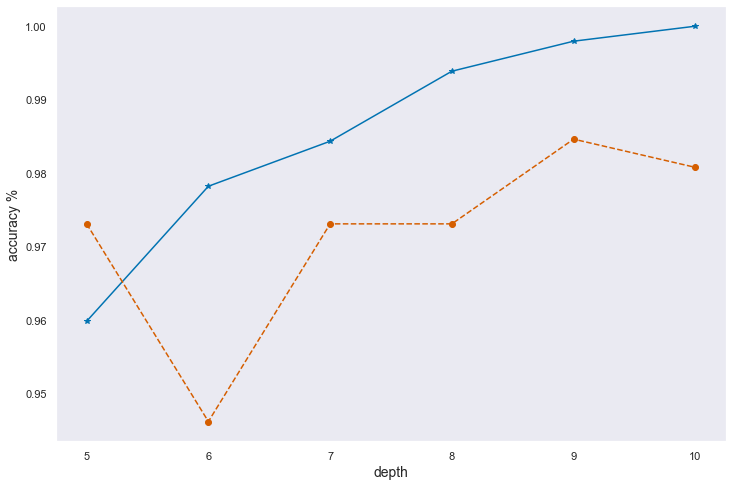

In [78]:
depth_params = [5,6,7,8,9,10]
plt.plot(depth_params, train_acc, "b-*")
plt.plot(depth_params, test_acc, "r--o")
plt.xlabel("depth", fontsize="14")
plt.ylabel("accuracy %", fontsize="14")
plt.show()